# Machine Learning Foundation

## Section 1, Part d: Feature Engineering


## Feature Engineering with Linear Regression: Applied to the Ames Housing Data

Using the Ames Housing Data:

Dean De Cock
Truman State University
Journal of Statistics Education Volume 19, Number 3(2011), www.amstat.org/publications/jse/v19n3/decock.pdf

In this notebook, we will build some linear regression models to predict housing prices from this data. In particular, we will set out to improve on a baseline set of features via **feature engineering**: deriving new features from our existing data. Feature engineering often makes the difference between a weak model and a strong one.

We will use visual exploration, domain understanding, and intuition to construct new features that will be useful later in the course as we turn to prediction.

**Notebook Contents**

> 1. Simple EDA
> 2. One-hot Encoding variables
> 3. Log transformation for skewed variables
> 4. Pair plot for features
> 5. Basic feature engineering: adding polynomial and interaction terms
> 6. Feature engineering: categories and features derived from category aggregates

## 1. Simple EDA


In [1]:
# Surpress warnings:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [2]:
%pylab inline
%config InlineBackend.figure_formats = ['retina']

import pandas as pd
import seaborn as sns
sns.set()

Populating the interactive namespace from numpy and matplotlib


#### Load the Data, Examine and Explore


In [3]:
## Load in the Ames Housing Data

df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML0232EN-SkillsNetwork/asset/Ames_Housing_Data.tsv", sep='\t')

In [4]:
## Examine the columns, look at missing data
df.info()

# This method prints a concise summary of the DataFrame `df`.
# It's useful for quickly understanding the structure of your data.
# The output includes:
# - The total number of entries (rows).
# - The number of columns and their names.
# - The number of non-null values for each column (helps identify missing data).
# - The data type (Dtype) of each column (e.g., int64, float64, object).
# - The memory usage of the DataFrame.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2930 non-null   int64  
 1   PID              2930 non-null   int64  
 2   MS SubClass      2930 non-null   int64  
 3   MS Zoning        2930 non-null   object 
 4   Lot Frontage     2440 non-null   float64
 5   Lot Area         2930 non-null   int64  
 6   Street           2930 non-null   object 
 7   Alley            198 non-null    object 
 8   Lot Shape        2930 non-null   object 
 9   Land Contour     2930 non-null   object 
 10  Utilities        2930 non-null   object 
 11  Lot Config       2930 non-null   object 
 12  Land Slope       2930 non-null   object 
 13  Neighborhood     2930 non-null   object 
 14  Condition 1      2930 non-null   object 
 15  Condition 2      2930 non-null   object 
 16  Bldg Type        2930 non-null   object 
 17  House Style   

In [8]:
df.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [5]:
# This is recommended by the data set author to remove a few outliers

df = df.loc[df['Gr Liv Area'] <= 4000,:]

# This line filters the DataFrame `df` to remove rows where the value in the
# 'Gr Liv Area' (Gross Living Area) column is greater than 4000.
# `df['Gr Liv Area'] <= 4000` creates a boolean Series: True for rows
# meeting the condition, False otherwise.
# `df.loc[...]` uses this boolean Series to select rows. The `,:` ensures
# all columns are retained for the selected rows.
# The original `df` is overwritten with this filtered version.

print("Number of rows in the data:", df.shape[0])

# This line prints the number of rows currently in the DataFrame `df`.
# `df.shape` returns a tuple (number_of_rows, number_of_columns).
# `df.shape[0]` accesses the first element of this tuple, which is the
# number of rows.

print("Number of columns in the data:", df.shape[1])
# This line prints the number of columns currently in the DataFrame `df`.
# `df.shape[1]` accesses the second element of the `df.shape` tuple,
# which is the number of columns.

data = df.copy() # Keep a copy our original data

# This line creates a deep copy of the (now filtered) DataFrame `df` and
# assigns it to a new variable named `data`.
# Using `.copy()` ensures that `data` is an independent DataFrame, so
# modifications to `data` will not affect `df`, and vice-versa.
# The comment suggests this is done to preserve a version of the data
# after this specific outlier removal step.

Number of rows in the data: 2925
Number of columns in the data: 82


In [6]:
# A quick look at the data:
df.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


We're going to first do some basic data cleaning on this data:

* Converting categorical variables to dummies
* Making skew variables symmetric

### One-hot encoding for dummy variables:


In [14]:
# Get a Pd.Series consisting of all the string categoricals

one_hot_encode_cols = df.dtypes[df.dtypes == object]  # filtering by string categoricals

# This line identifies columns in the DataFrame `df` that have an object
# data type, which in pandas often represents string data or mixed types.
# `df.dtypes` returns a Series where the index is column names and values
# are their respective data types.
# `[df.dtypes == object]` filters this Series to keep only those columns
# whose data type is `object` (the built-in Python type, which pandas uses
# to denote these columns).
# The resulting filtered Series is assigned to `one_hot_encode_cols`.

one_hot_encode_cols = one_hot_encode_cols.index.tolist()  # list of categorical fields

# This line takes the Series `one_hot_encode_cols` (which contains the names
# of object-type columns as its index and their dtypes as values) and
# extracts just the column names.
# `.index` accesses the index of the Series (the column names).
# `.tolist()` converts this index object into a standard Python list of strings.
# So, `one_hot_encode_cols` is now a list of column names with object dtype.

df[one_hot_encode_cols].head().T

# This line performs several operations to display a transposed sample of the
# object-type columns.
# 1. `df[one_hot_encode_cols]`: Selects only the columns from DataFrame `df`
#    whose names are in the `one_hot_encode_cols` list. This creates a
#    sub-DataFrame containing only the identified object-type columns.
# 2. `.head()`: Takes the first 5 rows of this sub-DataFrame.
# 3. `.T`: Transposes the resulting 5-row sub-DataFrame. Transposing swaps
#    rows and columns, so the column names will become the index, and the
#    first 5 rows' data for these columns will be displayed as columns.
# This is often used for a quick inspection of the first few values in these
# categorical (or string) columns.

,0,1,2,3,4


We're going to first do some basic data cleaning on this data:

* Converting categorical variables to dummies
* Making skew variables symmetric

#### One-hot encoding the dummy variables:


In [15]:
# Do the one hot encoding

df = pd.get_dummies(df, columns=one_hot_encode_cols, drop_first=True)

# This line performs one-hot encoding on the DataFrame `df`.
# `pd.get_dummies()` is a pandas function that converts categorical variables
# into dummy/indicator variables.
# `df` is the DataFrame to be processed.
# `columns=one_hot_encode_cols` specifies the list of column names (presumably
# containing categorical data identified in previous steps) that should be
# one-hot encoded.
# `drop_first=True` is an important parameter. For each categorical column,
# it creates k-1 dummy variables instead of k (where k is the number of unique
# categories). This helps to avoid multicollinearity, which can be an issue
# for some machine learning models. For example, if a column 'Color' has
# categories 'Red', 'Green', 'Blue', `drop_first=True` might create columns
# for 'Green' and 'Blue', and the case where both are 0 would represent 'Red'.
# The original `df` is updated with these new one-hot encoded columns, and the
# original categorical columns specified in `one_hot_encode_cols` are removed.

df.describe().T

# This line generates descriptive statistics for the DataFrame `df` and then
# transposes the result.
# 1. `df.describe()`: Computes various summary statistics for each numerical
#    column in the DataFrame `df` (e.g., count, mean, std, min, max,
#    quartiles). For object/categorical columns (if any remain and aren't
#    excluded by default in `describe()` for purely numerical summaries),
#    it would provide different statistics (like count, unique, top, freq).
# 2. `.T`: This attribute transposes the resulting

,count,mean,std,min,25%,50%,75%,max
Order,2925.0,1.464795e+03,8.464417e+02,1.0,7.320000e+02,1463.0,2.199000e+03,2.930000e+03
PID,2925.0,7.143931e+08,1.887274e+08,526301100.0,5.284770e+08,535453210.0,9.071801e+08,1.007100e+09
MS SubClass,2925.0,5.739658e+01,4.266875e+01,20.0,2.000000e+01,50.0,7.000000e+01,1.900000e+02
Lot Frontage,2435.0,6.902382e+01,2.271092e+01,21.0,5.800000e+01,68.0,8.000000e+01,3.130000e+02
Lot Area,2925.0,1.010358e+04,7.781999e+03,1300.0,7.438000e+03,9428.0,1.151500e+04,2.152450e+05
Overall Qual,2925.0,6.088205e+00,1.402953e+00,1.0,5.000000e+00,6.0,7.000000e+00,1.000000e+01
Overall Cond,2925.0,5.563761e+00,1.112262e+00,1.0,5.000000e+00,5.0,6.000000e+00,9.000000e+00
Year Built,2925.0,1.971303e+03,3.024247e+01,1872.0,1.954000e+03,1973.0,2.001000e+03,2.010000e+03
Year Remod/Add,2925.0,1.984234e+03,2.086177e+01,1950.0,1.965000e+03,1993.0,2.004000e+03,2.010000e+03
Mas Vnr Area,2902.0,1.007105e+02,1.760343e+02,0.0,0.000000e+00,0.0,1.640000e+02,1.600000e+03


### Log transforming skew variables


In [25]:
# Create a list of float colums to check for skewing

mask = data.dtypes == float

# This line creates a boolean mask to identify columns in the 'data'
# DataFrame that have a float data type.
# `data.dtypes` returns a Series with column names as index and their
# data types as values.
# `== np.float` compares each data type to `np.float` (NumPy's float type).
# Note: `np.float` was deprecated in NumPy 1.20; using `float` or
# `np.floating` (for any float precision) is now preferred. If this line
# causes an AttributeError, change `np.float` to `float`.

float_cols = data.columns[mask]

# This line uses the boolean `mask` created above to select the names of
# columns that are of float type.
# `data.columns` is an Index object containing all column names.
# Applying the boolean `mask` filters this Index, so `float_cols` becomes
# an Index object containing only the names of columns where `mask` is True.

skew_limit = 0.75 # define a limit above which we will log transform

# This line defines a variable `skew_limit` and assigns it the value 0.75.
# As the comment suggests, this threshold will likely be used later to
# determine if a column's skewness is high enough to warrant a log
# transformation, a common technique to reduce positive skewness.

skew_vals = data[float_cols].skew()

# This line calculates the skewness for each of the floating-point columns
# identified in `float_cols`.
# `data[float_cols]` creates a new DataFrame containing only these float columns.
# `.skew()` is a pandas DataFrame method that computes the sample skewness
# (a measure of asymmetry) for each column.
# The result, `skew_vals`, is a pandas Series where the index is the column
# names from `float_cols` and the values are their respective skewness scores.

In [18]:
# Showing the skewed columns
skew_cols = (skew_vals

# This line starts a chain of pandas operations on the `skew_vals` Series
# (which presumably contains skewness values for various columns, calculated
# in a previous step). The result of these chained operations will be
# assigned to the variable `skew_cols`.

             .sort_values(ascending=False)

# This method sorts the `skew_vals` Series in descending order.
# `ascending=False` ensures that the columns with the highest skewness
# values appear at the top.

             .to_frame()

# This method converts the sorted pandas Series into a pandas DataFrame.
# The Series values will become a single column in the DataFrame, and the
# Series index (column names) will become the DataFrame's index.
# By default, the new column might be named 0.

             .rename(columns={0:'Skew'})

# This method renames the column(s) of the DataFrame created in the previous
# step. Here, it's renaming the column that was automatically named `0`
# (by `.to_frame()`) to 'Skew'.

             .query('abs(Skew) > {}'.format(skew_limit)))

# This method filters the DataFrame based on a query string.
# `'abs(Skew) > {}'.format(skew_limit)` creates a query string that selects
# rows where the absolute value of the 'Skew' column is greater than the
# `skew_limit` (which was previously defined, e.g., as 0.75).
# This effectively filters for columns that are considered highly skewed,
# either positively or negatively.
# The result is a DataFrame containing only the highly skewed columns and
# their skewness values, assigned to `skew_cols`.

skew_cols

,Skew
BsmtFin SF 2,4.135900
Bsmt Half Bath,3.965970
Mas Vnr Area,2.565458
Lot Frontage,1.111071
Bsmt Unf SF,0.925021
BsmtFin SF 1,0.821985


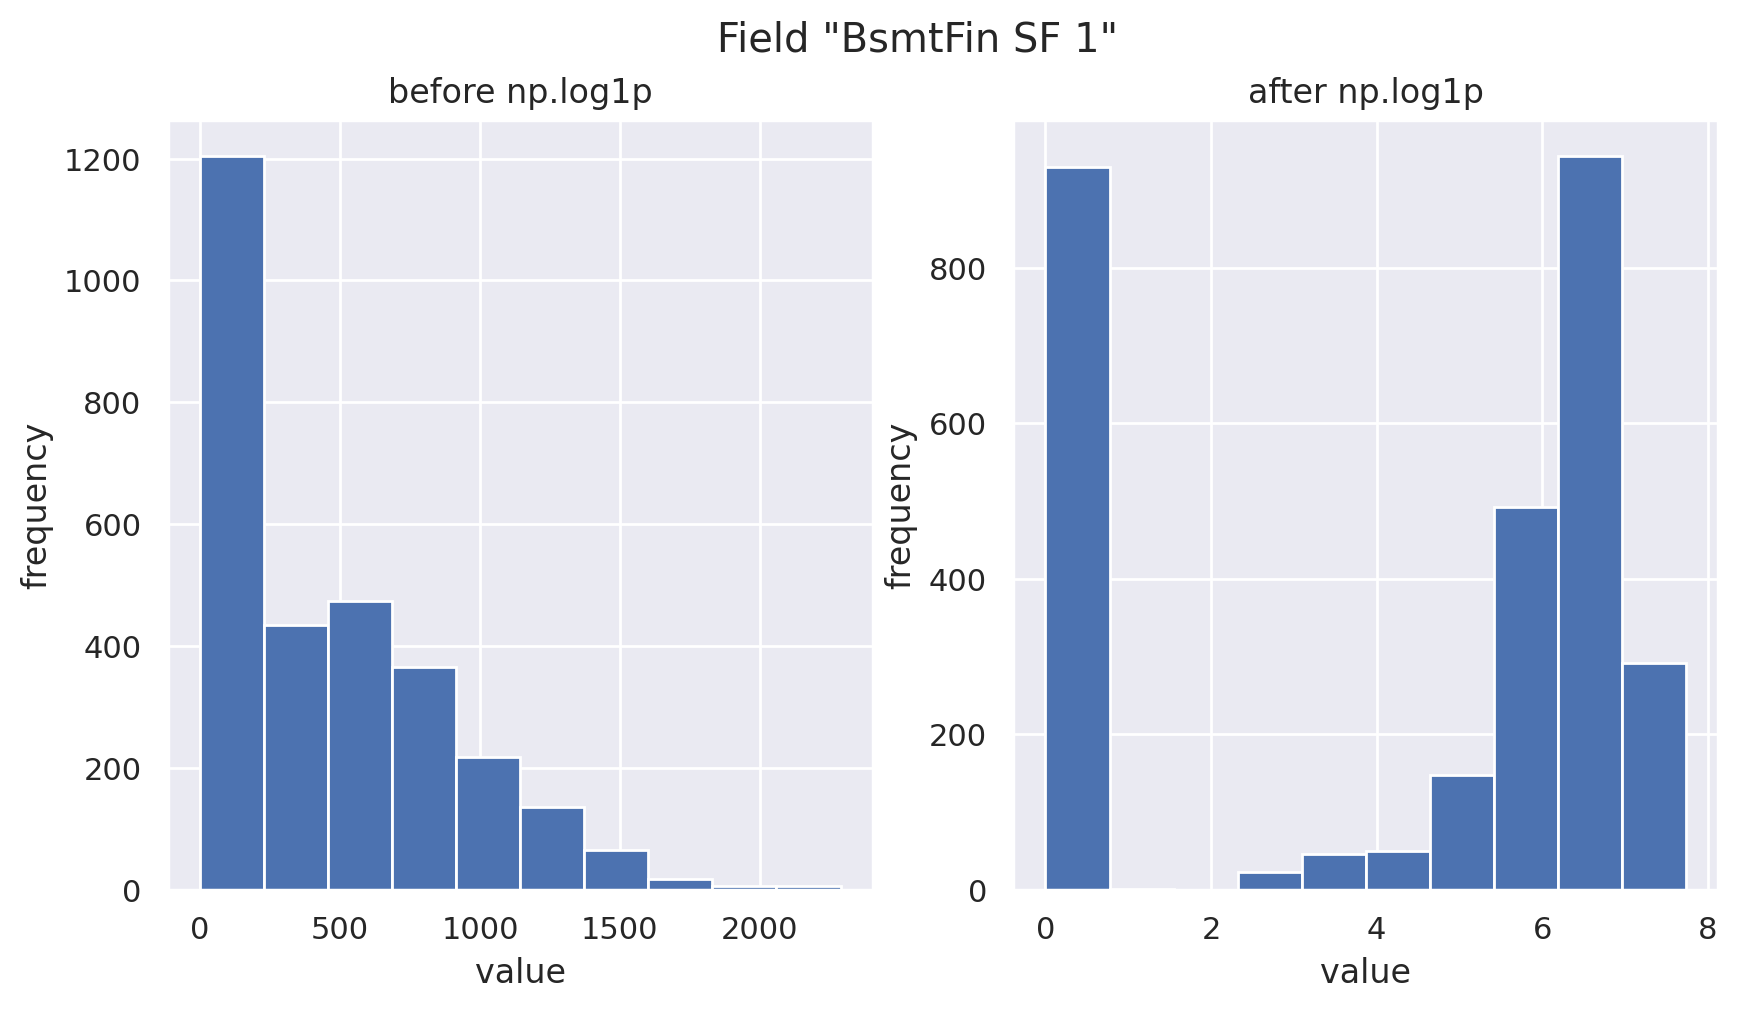

In [26]:
# Let's look at what happens to one of these features, when we apply np.log1p visually.

# Choose a field
field = "BsmtFin SF 1"

# This line selects a specific column name from the DataFrame `df` and assigns
# it to the variable `field`. The chosen field is "BsmtFin SF 1" (Basement
# Finished Square Feet Type 1), which will be used for visualization.

# Create two "subplots" and a "figure" using matplotlib

fig, (ax_before, ax_after) = plt.subplots(1, 2, figsize=(10, 5))

# This line creates a Matplotlib figure and a set of subplots within that figure.
# `plt.subplots(1, 2)` creates a figure with 1 row and 2 columns of subplots.
# `fig` is the Figure object (the entire window or canvas).
# `(ax_before, ax_after)` is a tuple unpacking the Axes objects for the two
# subplots. `ax_before` will be the first subplot (left), and `ax_after`
# will be the second subplot (right).
# `figsize=(10, 5)` sets the width and height of the figure to 10 and 5
# inches, respectively.

# Create a histogram on the "ax_before" subplot

df[field].hist(ax=ax_before)

# This line plots a histogram of the original data for the selected `field`.
# `df[field]` selects the Series (column) corresponding to the `field` name
# from the DataFrame `df`.
# `.hist()` is a pandas Series method that generates a histogram.
# `ax=ax_before` specifies that this histogram should be drawn on the
# `ax_before` subplot (the left one).

# Apply a log transformation (numpy syntax) to this column

df[field].apply(np.log1p).hist(ax=ax_after)

# This line first applies a logarithmic transformation to the data in the
# selected `field` and then plots a histogram of the transformed data.
# `df[field].apply(np.log1p)` applies the `np.log1p` function to each element
# in the Series `df[field]`. `np.log1p(x)` calculates `log(1 + x)`, which is
# useful for data with zero values or when values are close to zero, as
# `log(0)` is undefined. It can help reduce right skewness.
# `.hist(ax=ax_after)` then generates a histogram of these transformed values
# and draws it on the `ax_after` subplot (the right one).

# Formatting of titles etc. for each subplot

ax_before.set(title='before np.log1p', ylabel='frequency', xlabel='value')

# This line sets the title, y-axis label, and x-axis label for the first
# subplot (`ax_before`), which displays the data before transformation.
# `title='before np.log1p'` sets the title of this subplot.
# `ylabel='frequency'` labels the y-axis as 'frequency'.
# `xlabel='value'` labels the x-axis as 'value'.

ax_after.set(title='after np.log1p', ylabel='frequency', xlabel='value')

# This line sets the title, y-axis label, and x-axis label for the second
# subplot (`ax_after`), which displays the data after the `np.log1p`
# transformation.
# `title='after np.log1p'` sets the title of this subplot.
# `ylabel='frequency'` labels the y-axis as 'frequency'.
# `xlabel='value'` labels the x-axis as 'value'.

fig.suptitle('Field "{}"'.format(field));

# This line sets a main title (super title) for the entire figure `fig`.
# `'Field "{}"'.format(field)` creates a string that includes the name of the
# `field` being visualized (e.g., "Field "BsmtFin SF 1"").
# The semicolon at the end is optional and suppresses the output of the
# function call in some interactive environments like Jupyter notebooks.

In [27]:
# Perform the skew transformation:

for col in skew_cols.index.values:
# This line starts a `for` loop that iterates over the column names.
# `skew_cols` is assumed to be a pandas DataFrame (likely from a previous
# step where highly skewed columns were identified).
# `skew_cols.index` accesses the index of this DataFrame (which contains the
# names of the skewed columns).
# `.values` converts this index object into a NumPy array of column names,
# and the loop iterates through each `col` (column name) in this array.

    if col == "SalePrice":
# Inside the loop, this line checks if the current column name `col`
# is exactly equal to the string "SalePrice".

        continue
# If the condition `col == "SalePrice"` is true, the `continue` statement
# is executed. This immediately stops the current iteration of the loop
# and jumps to the beginning of the loop for the next column name.
# This effectively skips the log transformation for the "SalePrice" column.

    df[col] = df[col].apply(np.log1p)
# If the current column `col` is not "SalePrice" (i.e., the `if` condition
# was false), this line applies a logarithmic transformation to that column
# in the DataFrame `df`.
# `df[col]` selects the Series corresponding to the current column name.
# `.apply(np.log1p)` applies the NumPy function `np.log1p` to each element
# in the selected column. `np.log1p(x)` calculates `log(1 + x)`, which is
# often used to reduce right skewness and handle zero values gracefully (as
# log(0) is undefined, but log(1+0) = 0).
# The original column `df[col]` is then overwritten with these transformed values.

In [28]:
# We now have a larger set of potentially-useful features

df.shape

(2925, 261)

In [29]:
# There are a *lot* of variables. Let's go back to our saved original data and look at how many values are missing for each variable.

df = data
data.isnull().sum().sort_values()

,0
Order,0
PID,0
MS SubClass,0
MS Zoning,0
Lot Area,0
...,...
Mas Vnr Type,1774
Fence,2354
Alley,2727
Misc Feature,2820


 Let's pick out just a few numeric columns to illustrate basic feature transformations.


In [30]:
smaller_df= df.loc[:,['Lot Area', 'Overall Qual', 'Overall Cond',
# This line creates a new DataFrame named `smaller_df`.
# It is a subset of an existing DataFrame `df`.

                      'Year Built', 'Year Remod/Add', 'Gr Liv Area',
# `df.loc[]` is used for label-based indexing. The first argument, `:`,
# indicates that all rows from the original DataFrame `df` are selected.

                      'Full Bath', 'Bedroom AbvGr', 'Fireplaces',
# The second argument is a list of column names. This list specifies
# which columns from `df` should be included in the new `smaller_df`.

                      'Garage Cars','SalePrice']]
# Only the columns explicitly listed (e.g., 'Lot Area', 'Overall Qual',
# ..., 'SalePrice') will be present in `smaller_df`. This is a common way
# to create a DataFrame with a specific selection of features.

In [31]:
# Now we can look at summary statistics of the subset data
smaller_df.describe().T
# This line generates descriptive statistics for the `smaller_df` DataFrame
# and then transposes the result for better readability.
# 1. `smaller_df.describe()`: This method computes various summary statistics
#    for each column in the `smaller_df` DataFrame. For numerical columns,
#    this includes count, mean, standard deviation, min, max, and quartiles
#    (25th, 50th, 75th percentiles). For object/categorical columns (if any
#    are included by `describe()`), it would show statistics like count,
#    unique values, top value, and frequency of the top value.
# 2. `.T`: This attribute transposes the DataFrame returned by `.describe

,count,mean,std,min,25%,50%,75%,max
Lot Area,2925.0,10103.583590,7781.999124,1300.0,7438.0,9428.0,11515.0,215245.0
Overall Qual,2925.0,6.088205,1.402953,1.0,5.0,6.0,7.0,10.0
Overall Cond,2925.0,5.563761,1.112262,1.0,5.0,5.0,6.0,9.0
Year Built,2925.0,1971.302906,30.242474,1872.0,1954.0,1973.0,2001.0,2010.0
Year Remod/Add,2925.0,1984.234188,20.861774,1950.0,1965.0,1993.0,2004.0,2010.0
Gr Liv Area,2925.0,1493.978803,486.273646,334.0,1126.0,1441.0,1740.0,3820.0
Full Bath,2925.0,1.564786,0.551386,0.0,1.0,2.0,2.0,4.0
Bedroom AbvGr,2925.0,2.853675,0.827737,0.0,2.0,3.0,3.0,8.0
Fireplaces,2925.0,0.596923,0.645349,0.0,0.0,1.0,1.0,4.0
Garage Cars,2924.0,1.765048,0.759834,0.0,1.0,2.0,2.0,5.0


In [32]:
smaller_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2925 entries, 0 to 2929
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Lot Area        2925 non-null   int64  
 1   Overall Qual    2925 non-null   int64  
 2   Overall Cond    2925 non-null   int64  
 3   Year Built      2925 non-null   int64  
 4   Year Remod/Add  2925 non-null   int64  
 5   Gr Liv Area     2925 non-null   int64  
 6   Full Bath       2925 non-null   int64  
 7   Bedroom AbvGr   2925 non-null   int64  
 8   Fireplaces      2925 non-null   int64  
 9   Garage Cars     2924 non-null   float64
 10  SalePrice       2925 non-null   int64  
dtypes: float64(1), int64(10)
memory usage: 274.2 KB


In [36]:
# There appears to be one NA in Garage Cars - we will take a simple approach and fill it with 0
smaller_df = smaller_df.fillna(0)
# This line fills all missing values (NaN - Not a Number) in the entire
# `smaller_df` DataFrame with the value 0.
# `smaller_df.fillna(0)` creates a new DataFrame where every NaN has been
# replaced by 0.
# The result is then assigned back to `smaller_df`, so the original
# `smaller_df` DataFrame is updated with its missing values filled.
# While the comment indicates a specific NA in 'Garage Cars', this operation
# will fill NaNs in any column of `smaller_df` with 0.

In [35]:
smaller_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2925 entries, 0 to 2929
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Lot Area        2925 non-null   int64  
 1   Overall Qual    2925 non-null   int64  
 2   Overall Cond    2925 non-null   int64  
 3   Year Built      2925 non-null   int64  
 4   Year Remod/Add  2925 non-null   int64  
 5   Gr Liv Area     2925 non-null   int64  
 6   Full Bath       2925 non-null   int64  
 7   Bedroom AbvGr   2925 non-null   int64  
 8   Fireplaces      2925 non-null   int64  
 9   Garage Cars     2925 non-null   float64
 10  SalePrice       2925 non-null   int64  
dtypes: float64(1), int64(10)
memory usage: 274.2 KB



### Pair plot of features
Now that we have a nice, filtered dataset, let's generate visuals to better understand the target and feature-target relationships: pairplot is great for this!


In [37]:
sns.pairplot(smaller_df, plot_kws=dict(alpha=.1, edgecolor='none'))

# This line uses the Seaborn library (imported as `sns`) to create a pair plot
# from the `smaller_df` DataFrame.
# A pair plot generates a matrix of axes, showing the relationship between
# each pair of numerical columns in the DataFrame.
# Off-diagonal plots are typically scatter plots showing the relationship
# between two variables.
# Diagonal plots usually show the univariate distribution (e.g., histogram
# or kernel density estimate) of each individual variable.
# `smaller_df` is the input DataFrame containing the data to be plotted.
# `plot_kws=dict(alpha=.1, edgecolor='none')` passes keyword arguments to
# the underlying plotting functions for the scatter plots (off-diagonal).
#   `alpha=.1`: Sets the transparency of the scatter plot markers to 0.1
#     (10% opaque). This is useful for visualizing density in areas with many
#     overlapping points.
#   `edgecolor='none'`: Removes the a_dfge color from the scatter plot markers.

Output hidden; open in https://colab.research.google.com to view.

---
**Data Exploration Discussion**:

1. What do these plots tell us about the distribution of the target?   

2. What do these plots tell us about the relationship between the features and the target? Do you think that linear regression is well-suited to this problem? Do any feature transformations come to mind?

3. What do these plots tell us about the relationship between various pairs of features? Do you think there may be any problems here?

---


#### Suppose our target variable is the SalePrice. We can set up separate variables for features and target.


In [41]:
#Separate our features from our target

X = smaller_df.loc[:,['Lot Area', 'Overall Qual', 'Overall Cond',
# This line creates a new DataFrame named `X`, which will contain the
# features (independent variables) for a machine learning model.
# `smaller_df.loc[]` is used for selecting data by labels.

                      'Year Built', 'Year Remod/Add', 'Gr Liv Area',
# The first argument, `:`, indicates that all rows from `smaller_df` are
# selected.

                      'Full Bath', 'Bedroom AbvGr', 'Fireplaces',
# The second argument is a list of column names. These specified columns
# are selected from `smaller_df` to form the feature set `X`.

                      'Garage Cars']]
# Only the columns explicitly listed (e.g., 'Lot Area', 'Overall Qual',
# ..., 'Garage Cars') will be included in the `X` DataFrame.

y = smaller_df['SalePrice']
# This line creates a pandas Series named `y`, which will contain the target
# variable (dependent variable) for the machine learning model.
# `smaller_df['SalePrice']` selects the single column 'SalePrice' from the
# `smaller_df` DataFrame. This column is typically what the model will try
# to predict.

In [40]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2925 entries, 0 to 2929
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Lot Area        2925 non-null   int64  
 1   Overall Qual    2925 non-null   int64  
 2   Overall Cond    2925 non-null   int64  
 3   Year Built      2925 non-null   int64  
 4   Year Remod/Add  2925 non-null   int64  
 5   Gr Liv Area     2925 non-null   int64  
 6   Full Bath       2925 non-null   int64  
 7   Bedroom AbvGr   2925 non-null   int64  
 8   Fireplaces      2925 non-null   int64  
 9   Garage Cars     2925 non-null   float64
dtypes: float64(1), int64(9)
memory usage: 251.4 KB


Now that we have feature/target data X, y ready to go, we're nearly ready to fit and evaluate a baseline model using our current feature set. We'll need to create a **train/validation split** before we fit and score the model.

Since we'll be repeatedly splitting X, y into the same train/val partitions and fitting/scoring new models as we update our feature set, we'll define a reusable function that completes all these steps, making our code/process more efficient going forward.


Great, let's go ahead and run this function on our baseline feature set and take some time to analyze the results.


### Basic feature engineering: adding polynomial and interaction terms


One of the first things that we looked for in the pairplot was evidence about the relationship between each feature and the target. In certain features like _'Overall Qual'_ and _'Gr Liv Qual'_, we notice an upward-curved relationship rather than a simple linear correspondence. This suggests that we should add quadratic **polynomial terms or transformations** for those features, allowing us to express that non-linear relationship while still using linear regression as our model.

Luckily, pandas makes it quite easy to quickly add those square terms as additional features to our original feature set. We'll do so and evaluate our model again below.

As we add to our baseline set of features, we'll create a copy of the latest benchmark so that we can continue to store our older feature sets.
### Polynomial Features


In [43]:
X2 = X.copy()
# This line creates a new DataFrame named `X2` as a deep copy of the
# existing DataFrame `X`.
# Using `.copy()` ensures that `X2` is an independent DataFrame, so any
# subsequent modifications made to `X2` will not affect the original `X`
# DataFrame, and vice-versa. This is often done to experiment with feature
# engineering without altering the original feature set.

X2['OQ2'] = X2['Overall Qual'] ** 2
# This line creates a new column named 'OQ2' in the `X2` DataFrame.
# The values for this new column are calculated by taking the existing
# 'Overall Qual' column from `X2` and squaring each of its values
# (element-wise exponentiation by 2). This is a common feature
# engineering technique to create a polynomial feature, which might help
# capture non-linear relationships in a model.

X2['GLA2'] = X2['Gr Liv Area'] ** 2
# Similar to the previous line, this creates another new column in `X2`,
# this one named 'GLA2'.
# Its values are computed by taking the 'Gr Liv Area' column from `X2`
# and squaring each element. This also creates a second-order polynomial
# feature based on the 'Gr Liv Area'.

As is, each feature is treated as an independent quantity. However, there may be **interaction effects**, in which the impact of one feature may dependent on the current value of a different feature.

For example, there may be a higher premium for increasing _'Overall Qual'_ for houses that were built more recently. If such a premium or a similar effect exists, a feature that multiplies _'Overall Qual'_ by _'Year Built'_ can help us capture it.

Another style of interaction term involves feature proprtions: for example, to get at something like quality per square foot we could divide _'Overall Qual'_ by _'Lot Area'_.

Let's try adding both of these interaction terms and see how they impact the model results.

### Feature interactions


In [44]:
X3 = X2.copy()
# This line creates a new DataFrame named `X3` as a deep copy of the
# existing DataFrame `X2`.
# Using `.copy()` ensures that `X3` is an independent DataFrame. Any
# modifications made to `X3` will not affect `X2`, allowing for further
# feature engineering experiments without altering the `X2` DataFrame.

# multiplicative interaction
X3['OQ_x_YB'] = X3['Overall Qual'] * X3['Year Built']
# This line creates a new feature (column) named 'OQ_x_YB' in the `X3`
# DataFrame. This is an example of a multiplicative interaction term.
# The values for this new column are calculated by performing an element-wise
# multiplication of the 'Overall Qual' column and the 'Year Built' column
# from the `X3` DataFrame. Interaction features can help models capture
# combined effects of variables.

# division interaction
X3['OQ_/_LA'] = X3['Overall Qual'] / X3['Lot Area']
# This line creates another new feature (column) in `X3`, named 'OQ_/_LA'.
# This is an example of a division interaction term, often representing a ratio.
# Its values are computed by performing an element-wise division of the
# 'Overall Qual' column by the 'Lot Area' column from `X3`. Such features
# can represent densities or relative measures. (Note: care should be taken
# if 'Lot Area' can contain zero values, as this would lead to division by zero).

-----
**Interaction Feature Exercise**: What other interactions do you think might be helpful? Why?

-----


### Categories and features derived from category aggregates


Incorporating **categorical features** into linear regression models is fairly straightforward: we can create a new feature column for each category value, and fill these columns with 1s and 0s to indicate which category is present for each row. This method is called **dummy variables** or **one-hot-encoding**.

We'll first explore this using the _'House Style'_ feature from the original dataframe. Before going straight to dummy variables, it's a good idea to check category counts to make sure all categories have reasonable representation.


In [45]:
data['House Style'].value_counts()

,count
House Style,
1Story,1480
2Story,869
1.5Fin,314
SLvl,128
SFoyer,83
2.5Unf,24
1.5Unf,19
2.5Fin,8


This looks ok, and here's a quick look at how dummy features actually appear:


In [46]:
pd.get_dummies(df['House Style'], drop_first=True).head()

,1.5Unf,1Story,2.5Fin,2.5Unf,2Story,SFoyer,SLvl
0,False,True,False,False,False,False,False
1,False,True,False,False,False,False,False
2,False,True,False,False,False,False,False
3,False,True,False,False,False,False,False
4,False,False,False,False,True,False,False


We can call `pd.get_dummies()` on our entire dataset to quickly get data with all the original features and dummy variable representation of any categorical features. Let's look at some variable values.


In [47]:
nbh_counts = df.Neighborhood.value_counts()
nbh_counts

,count
Neighborhood,
NAmes,443
CollgCr,267
OldTown,239
Edwards,191
Somerst,182
NridgHt,166
Gilbert,165
Sawyer,151
NWAmes,131


For this category, let's map the few least-represented neighborhoods to an "other" category before adding the feature to our feature set and running a new benchmark.


In [48]:
other_nbhs = list(nbh_counts[nbh_counts <= 8].index)

other_nbhs

['Greens', 'GrnHill', 'Landmrk']

In [49]:
X4 = X3.copy()

X4['Neighborhood'] = df['Neighborhood'].replace(other_nbhs, 'Other')


#### Getting to fancier features

Let's close out our introduction to feature engineering by considering a more complex type of feature that may work very nicely for certain problems. It doesn't seem to add a great deal over what we have so far, but it's a style of engineering to keep in mind for the future.

We'll create features that capture where a feature value lies relative to the members of a category it belongs to. In particular, we'll calculate deviance of a row's feature value from the mean value of the category that row belongs to. This helps to capture information about a feature relative to the category's distribution, e.g. how nice a house is relative to other houses in its neighborhood or of its style.

Below we define reusable code for generating features of this form, feel free to repurpose it for future feature engineering work!


In [58]:
def add_deviation_feature(X, feature, category):
# This line defines a function named `add_deviation_feature`.
# It takes three arguments:
#   `X`: A pandas DataFrame on which the new feature will be added.
#   `feature`: A string, the name of the numerical column for which to
#              calculate the deviation.
#   `category`: A string, the name of the categorical column used for grouping.

    # temp groupby object
    category_gb = X.groupby(category)[feature]
    # This line groups the DataFrame `X` by the unique values in the `category`
    # column.
    # Then, it selects the `feature` column from these grouped objects.
    # `category_gb` becomes a pandas SeriesGroupBy object, which allows for
    # group-wise computations on the `feature` column based on `category`.

    # create category means and standard deviations for each observation
    category_mean = category_gb.transform(lambda x: x.mean())
    # This line calculates the mean of the `feature` for each `category`.
    # `.transform(lambda x: x.mean())` applies the mean function to each group
    # defined by `category_gb` and then broadcasts the result back to match
    # the original DataFrame's index. So, `category_mean` is a Series of the
    # same length as `X`, where each value is the mean of `feature` for the
    # specific `category` of that row.

    category_std = category_gb.transform(lambda x: x.std())
    # Similar to the previous line, this calculates the standard deviation of
    # the `feature` for each `category`.
    # `category_std` is a Series of the same length as `X`, where each value
    # is the standard deviation of `feature` for the row's `category`.

    # compute stds from category mean for each feature value,
    # add to X as new feature
    deviation_feature = (X[feature] - category_mean) / category_std
    # This line calculates the deviation feature. For each row, it computes
    # how many standard deviations the `feature` value is away from its
    # `category`'s mean for that `feature`. This is essentially a z-score
    # calculated within each category.
    # `X[feature] - category_mean`: Difference from the category mean.
    # `/ category_std`: Standardizes this difference by the category std dev.
    # (Note: if `category_std` is zero for any group, this could result in
    #  NaN or infinity; handling for this might be needed in robust code).

    X[feature + '_Dev_' + category] = deviation_feature
    # This line adds the newly computed `deviation_feature` as a new column
    # to the input DataFrame `X`.
    # The name of the new column is dynamically created by concatenating the
    # original `feature` name, the string '_Dev_', and the `category` name
    # (e.g., if feature is 'Age' and category is 'Gender', the new column might
    # be 'Age_Dev_Gender').
    # The function modifies the DataFrame `X` in place.

And now let's use our feature generation code to add 2 new deviation features, and run a final benchmark.


In [59]:
X5 = X4.copy()
X5['House Style'] = df['House Style']
add_deviation_feature(X5, 'Year Built', 'House Style')
add_deviation_feature(X5, 'Overall Qual', 'Neighborhood')


## Polynomial Features in Scikit-Learn

`sklearn` allows you to build many higher-order terms at once with `PolynomialFeatures`


In [60]:
from sklearn.preprocessing import PolynomialFeatures

In [61]:
#Instantiate and provide desired degree;
#   Note: degree=2 also includes intercept, degree 1 terms, and cross-terms

pf = PolynomialFeatures(degree=2)

In [62]:
features = ['Lot Area', 'Overall Qual']
pf.fit(df[features])

PolynomialFeatures()

In [67]:
pf.get_feature_names_out(input_features=features)

# This method generates feature names after transformation by a preprocessing
# or feature engineering step (e.g., PolynomialFeatures, OneHotEncoder).
# The `input_features=features` parameter ensures the output names are based on
# the original feature names provided in the `features` variable. Without it,
# the transformer might use generic names like "x0", "x1", etc.
#
# Example: If `features = ['age', 'income']` and `pf` is PolynomialFeatures,
# the output could be ['age', 'income', 'age^2', 'age income', 'income^2'].

array(['1', 'Lot Area', 'Overall Qual', 'Lot Area^2',
       'Lot Area Overall Qual', 'Overall Qual^2'], dtype=object)

In [69]:
feat_array = pf.transform(df[features])
# Applies the transformation (e.g., PolynomialFeatures, OneHotEncoder) stored in
# `pf` to the selected columns (`features`) from DataFrame `df`. The output is
# a NumPy array (`feat_array`) containing the transformed features, but without
# column names for readability.

pd.DataFrame(feat_array, columns = pf.get_feature_names_out(input_features=features))
# Converts the transformed NumPy array (`feat_array`) back into a pandas
# DataFrame with meaningful column names. The `columns` parameter uses
# `pf.get_feature_names_out()` to generate descriptive names based on the
# original `features`, ensuring the output is interpretable (e.g., 'age^2',
# 'age*income' for polynomial features).

,1,Lot Area,Overall Qual,Lot Area^2,Lot Area Overall Qual,Overall Qual^2
0,1.0,31770.0,6.0,1.009333e+09,190620.0,36.0
1,1.0,11622.0,5.0,1.350709e+08,58110.0,25.0
2,1.0,14267.0,6.0,2.035473e+08,85602.0,36.0
3,1.0,11160.0,7.0,1.245456e+08,78120.0,49.0
4,1.0,13830.0,5.0,1.912689e+08,69150.0,25.0
...,...,...,...,...,...,...
2920,1.0,7937.0,6.0,6.299597e+07,47622.0,36.0
2921,1.0,8885.0,5.0,7.894322e+07,44425.0,25.0
2922,1.0,10441.0,5.0,1.090145e+08,52205.0,25.0
2923,1.0,10010.0,5.0,1.002001e+08,50050.0,25.0


## Recap

While we haven't yet turned to prediction, these feature engineering exercises set the stage. Generally, feature engineering often follows a sort of [*Pareto principle*](https://en.wikipedia.org/wiki/Pareto_principle?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0232ENSkillsNetwork837-2023-01-01), where a large bulk of the predictive gains can be reached through adding a set of intuitive, strong features like polynomial transforms and interactions. Directly incorporating additional information like categorical variables can also be very helpful. Beyond this point, additional feature engineering can provide significant, but potentially diminishing returns. Whether it's worth it depends on the use case for the model.


The Pareto Principle, also known as the 80/20 Rule, states that:

```
"Roughly 80% of effects come from 20% of causes."
```

It was named after Italian economist Vilfredo Pareto, who observed in 1896 that 80% of Italy's wealth was owned by 20% of the population. Later, this concept was generalized to various fields.

---
### Machine Learning Foundation (C) 2020 IBM Corporation
